# IA - Algoritmos de Busca (Exercícios)

## Importações

In [390]:
import numpy as np
from numpy import random
import random
import pandas as pd
from math import sqrt
import networkx as nx

from collections import deque

## Inicializações

In [391]:
G_inicial = nx.Graph()

In [392]:
# inicializando manualmente as cidades (vérticies) e
# os respectivos custos entre elas (arestas).

G_inicial.add_weighted_edges_from([
        ("Arad", "Sibiu", 140),
        ("Arad", "Timisoara", 118),
        ("Arad", "Zerind", 75),
        ("Bucharest", "Fagaras", 211),
        ("Bucharest", "Giurgiu", 90),
        ("Bucharest", "Pitesti", 101),
        ("Bucharest", "Urziceni", 85),
        ("Craiova", "Dobreta", 120),
        ("Craiova", "Pitesti", 138),
        ("Craiova", "Rimnicu_Vilcea", 146),
        ("Dobreta", "Mehadia", 75),
        ("Eforie", "Hirsova", 86),
        ("Fagaras", "Sibiu", 99),
        ("Hirsova", "Urziceni", 98),
        ("Iasi", "Neamt", 87),
        ("Iasi", "Vaslui", 92),
        ("Lugoj", "Mehadia", 70),
        ("Lugoj", "Timisoara", 111),
        ("Oradea", "Zerind", 71),
        ("Oradea", "Sibiu", 151),
        ("Pitesti", "Rimnicu_Vilcea", 97),
        ("Rimnicu_Vilcea", "Sibiu", 80),
        ("Urziceni", "Vaslui", 142)
    ])

Caminho: ['Arad', 'Sibiu', 'Rimnicu_Vilcea', 'Pitesti', 'Bucharest']
140 + 80 + 97 + 

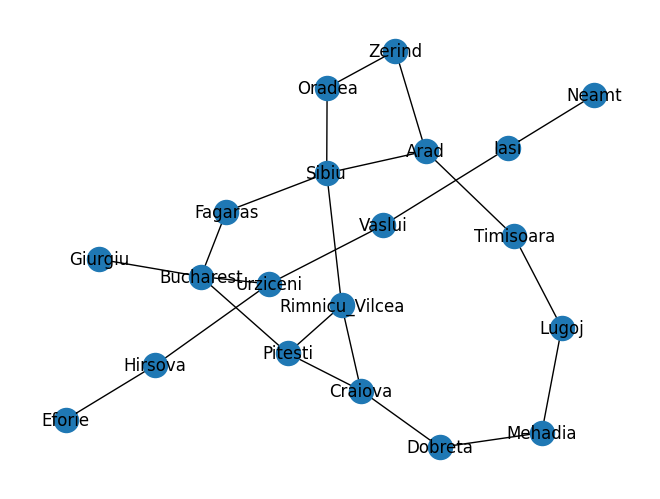

In [393]:
# Plotando para conferir
nx.draw(G_inicial, with_labels=True)

In [394]:
# Caso as cidades possuam as coordenadas de latitude e longitude
# a heurística poderá ser calculada através da distância euclidiana.
# Porém, para simplificar o exercício, é fornecida uma tabela
# (um dicionário)  com os valores das estimativas de distâncias.


# Estimativa das distâncias de todas as cidades com destino 
# para Bucharest

Estimation = {
        "Arad": 366,
        "Bucharest": 0,
        "Craiova": 160,
        "Dobreta": 242,
        "Eforie": 161,
        "Fagaras": 178,
        "Giurgiu": 77,
        "Hirsova": 151,
        "Iasi": 226,
        "Lugoj": 244,
        "Mehadia": 241,
        "Neamt": 234,
        "Oradea": 380,
        "Pitesti": 98,
        "Rimnicu_Vilcea": 193,
        "Sibiu": 253,
        "Timisoara": 329,
        "Urziceni": 80,
        "Vaslui": 199,
        "Zerind": 374
}

## Funções auxiliares

### Cálculo do custo do caminho

In [395]:
# Calcula custo total de um caminho
def calcula_custo_caminho(G, caminho):
    custo = 0.0
    for i in range(len(caminho)-1):
        u, v = caminho[i], caminho[i+1]
        custo += G[u][v]['weight']
    return custo


### Cálculo custo do nó origem até o nó atual: custo g(n)


In [396]:
# calcula custo do caminho da cidade origem até a cidade atual
def calcula_custo_g(G, caminho_origem_atual):
    return calcula_custo_caminho(G, caminho_origem_atual)

### Estimativa do custo do nó atual para o destino: custo h(n)


In [397]:
# No futuro, a funcao abaixo será substituída apropriadamente
# para os cálculos das estimativas euclidianas
def estima_custo_h(cidade_atual):
    # destino == 'Bucharest':
    return Estimation[cidade_atual]

In [398]:
# Exemplo
estima_custo_h('Zerind')

374

## Algoritmo BFS

In [399]:
# Implementação do algoritmo BFS

In [400]:
def BFS(G_inicial, s):

    G = G_inicial.copy()
    
    # INICIALIZACAO
    for v in G.nodes() - {s}:
        G.nodes[v]['cor'] = 'branco'
        G.nodes[v]['dis'] = np.inf

    G.nodes[s]['cor'] = 'cinza'
    G.nodes[s]['dis'] = 0

    # Fila (append (right), popleft)
    Q = deque()
    Q.append(s)
    while len(Q) != 0:
        u = Q.popleft()
        
        for v in G.neighbors(u):
            
            if G.nodes[v]['cor'] == 'branco':
                G.nodes[v]['cor'] = 'cinza'
                G.nodes[v]['dis'] = G.nodes[u]['dis'] + 1
                G.nodes[v]['pre'] = u

                Q.append(v)

        G.nodes[u]['cor'] = 'preto'
        nx.set_node_attributes(G, {u:{'dis':0}})
        #print(u, G.nodes[u]['dis'], G.nodes[u]['cor'])

    # Grafo G retornado contem as informações de distância
    # e cores desde o nó origem a todos os demais nós
    return G

#----------------------------------------------------------------

def caminho_minimo_BFS(G, s, t):

    L = [t]
    u = t
    while u != s:
        u = G.nodes[u]['pre']
        L.append(u)

    L.reverse()

    return L

In [401]:
# Plotando para conferir


## Algoritmo UCS (Custo Uniforme)

In [402]:
# Implemente aqui o algoritmo UCS (Custo Uniforme)
# f(n) = g(n)

In [403]:
def UCS(G_inicial, s):

    G = G_inicial.copy()
    # print(G)    
    # INICIALIZACAO
    for v in G.nodes() - {s}:
        G.nodes[v]['cor'] = 'branco'
        G.nodes[v]['acumulado'] = 0
        G.nodes[v]['dis'] = 0

    G.nodes[s]['cor'] = 'cinza'
    G.nodes[s]['dis'] = 0
    
    # Fila (append (right), popleft)
    Q = deque()
    Q.append(s)
    while len(Q) != 0:
        # print(Q)
        Q = sorted(Q)
        u = Q.pop()
        # print(Q)
 
       
        # print(less_expensive)

        for v in G.neighbors(u):
        
            # if ((G.nodes[u]['dis'] + G[u][v]['weight']) < G.nodes[v]['dis'] ):
            # print("Demais nós.")
            if G.nodes[v]['cor'] == 'branco':
                G.nodes[v]['cor'] = 'cinza'
                G.nodes[v]['dis'] = G.nodes[u]['dis'] + G[u][v]['weight']
                G.nodes[v]['pre'] = u
                Q.append(v)
            
            

        G.nodes[u]['cor'] = 'preto'
        nx.set_node_attributes(G, {u:{'dis':G.nodes[u]['dis']}})
       
       

        #print(u, G.nodes[u]['dis'], G.nodes[u]['cor'])

    # Grafo G retornado contem as informações de distância
    # e cores desde o nó origem a todos os demais nós
    return G

#----------------------------------------------------------------

def caminho_minimo_UCS(G, s, t):

    L = [t]
    u = t
    while u != s:
        u = G.nodes[u]['pre']
        L.append(u)

    L.reverse()

    return L

## Algoritmo A-star

In [404]:
from heapq import heappop, heappush
from itertools import count
from networkx.algorithms.shortest_paths.weighted import _weight_function

In [405]:
# Implemente aqui o algoritmo A-star
# f(n) = g(n) + h(n)

def A_star(G_inicial, s):

    G = G_inicial.copy()
    # print(G)    
    # INICIALIZACAO
    for v in G.nodes() - {s}:
        G.nodes[v]['cor'] = 'branco'
        G.nodes[v]['acumulado'] = 0
        G.nodes[v]['dis'] = 0

    G.nodes[s]['cor'] = 'cinza'
    G.nodes[s]['dis'] = 0
    
    # Fila (append (right), popleft)
    Q = deque()
    Q.append(s)
    less_expensive = {None}
    while len(Q) != 0:
        # print(Q)
        Q = sorted(Q)
        u = Q.pop()
        # print(Q)
 
       
        # print(less_expensive)

        for v in G.neighbors(u):
        
            # if ((G.nodes[u]['dis'] + G[u][v]['weight']) < G.nodes[v]['dis'] ):
            # print("Demais nós.")
            if G.nodes[v]['cor'] == 'branco':
                G.nodes[v]['cor'] = 'cinza'
                G.nodes[v]['dis'] = G.nodes[u]['dis'] + G[u][v]['weight'] + estima_custo_h(v)
                G.nodes[v]['pre'] = u
                Q.append(v)
            
            

        G.nodes[u]['cor'] = 'preto'
        nx.set_node_attributes(G, {u:{'dis':G.nodes[u]['dis']}})

        #print(u, G.nodes[u]['dis'], G.nodes[u]['cor'])

    # Grafo G retornado contem as informações de distância
    # e cores desde o nó origem a todos os demais nós
    return G

#----------------------------------------------------------------

def caminho_minimo_A_star(G, s, t):

    L = [t]
    u = t
    while u != s:
        u = G.nodes[u]['pre']
        L.append(u)

    L.reverse()

    return L



## Programa Principal

### Inicializações

In [406]:
origem = 'Arad'
destino = 'Bucharest'

### BFS

In [407]:
# BFS
G = BFS(G_inicial, origem)
caminho = caminho_minimo_BFS(G, origem, destino)

custo = calcula_custo_caminho(G, caminho)

print(f'Custo: {custo}\t->\tCaminho: {caminho}')

Custo: 450.0	->	Caminho: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']


In [408]:
# Chame aqui apropriadamente os algoritmos para resolver o problema

### UCS

In [409]:
# UCS
# BFS
G = UCS(G_inicial, origem)
caminho = caminho_minimo_UCS(G, origem, destino)

custo = calcula_custo_caminho(G, caminho)

print(f'Custo: {custo}\t->\tCaminho: {caminho}')

Custo: 418.0	->	Caminho: ['Arad', 'Sibiu', 'Rimnicu_Vilcea', 'Pitesti', 'Bucharest']


### A-STAR

In [410]:
# A-star
G = A_star(G_inicial, origem)
caminho = caminho_minimo_A_star(G, origem, destino)

custo = calcula_custo_caminho(G, caminho)

print(f'Custo: {custo}\t->\tCaminho: {caminho}')

Custo: 418.0	->	Caminho: ['Arad', 'Sibiu', 'Rimnicu_Vilcea', 'Pitesti', 'Bucharest']
